In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [2]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    '/Users/amoakoheskey/Desktop/CS50/10_ML_projects/Brain-tumor/datasets',
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(224,224),
    batch_size=(16),
)
validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    '/Users/amoakoheskey/Desktop/CS50/10_ML_projects/Brain-tumor/datasets',
    validation_split=0.1,
    subset="validation",
    seed=123,
    image_size=(224,224),
    batch_size=(16),
)



Found 253 files belonging to 2 classes.
Using 203 files for training.
Found 253 files belonging to 2 classes.
Using 25 files for validation.


In [3]:
def preprocess(image,label):
    image = tf.cast(image,tf.float32)
    image = image/255
    return image,label

train_dataset = train_dataset.map(preprocess)
# validation_dataset = test_dataset.map(preprocess)
validation_dataset = validation_dataset.map(preprocess)

In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(224,224,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32,activation='softmax'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(16,activation='softmax'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(2,activation='softmax'),
])

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [6]:
history = model.fit(train_dataset,epochs=15,validation_data = validation_dataset)

Epoch 1/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 453ms/step - accuracy: 0.6758 - loss: 0.6664 - val_accuracy: 0.6400 - val_loss: 0.6664
Epoch 2/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 444ms/step - accuracy: 0.6356 - loss: 0.6630 - val_accuracy: 0.6400 - val_loss: 0.6653
Epoch 3/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 462ms/step - accuracy: 0.5940 - loss: 0.6720 - val_accuracy: 0.6400 - val_loss: 0.6643
Epoch 4/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 539ms/step - accuracy: 0.5550 - loss: 0.6869 - val_accuracy: 0.6400 - val_loss: 0.6634
Epoch 5/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 433ms/step - accuracy: 0.6369 - loss: 0.6645 - val_accuracy: 0.6400 - val_loss: 0.6618
Epoch 6/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 427ms/step - accuracy: 0.5881 - loss: 0.6785 - val_accuracy: 0.6400 - val_loss: 0.6613
Epoch 7/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 435ms/step - accuracy: 0.6086 - loss: 0.6733 - val_accuracy: 0.6400 - val_loss: 0.6607
Epoch 8/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 488ms/step - accuracy: 0.6253 - loss: 0.6675 - val_accuracy: 0.

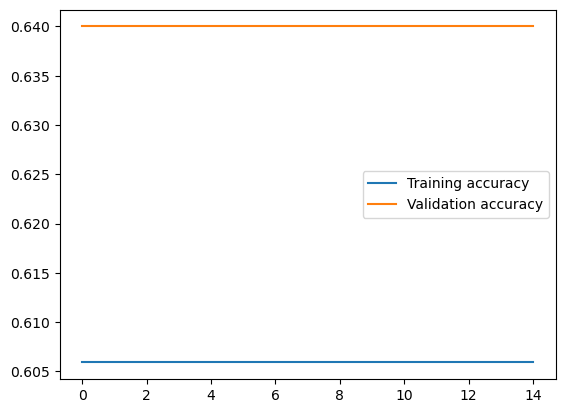

In [7]:
plt.plot(history.history['accuracy'],label = 'Training accuracy')
plt.plot(history.history['val_accuracy'],label = 'Validation accuracy')
plt.legend()
plt.show()

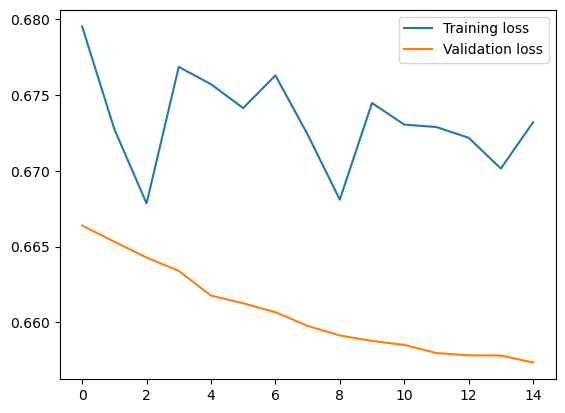

In [8]:
plt.plot(history.history['loss'],label = 'Training loss')
plt.plot(history.history['val_loss'],label = 'Validation loss')
plt.legend()
plt.show()

In [9]:
history.params

{'verbose': 'auto', 'epochs': 15, 'steps': 13}

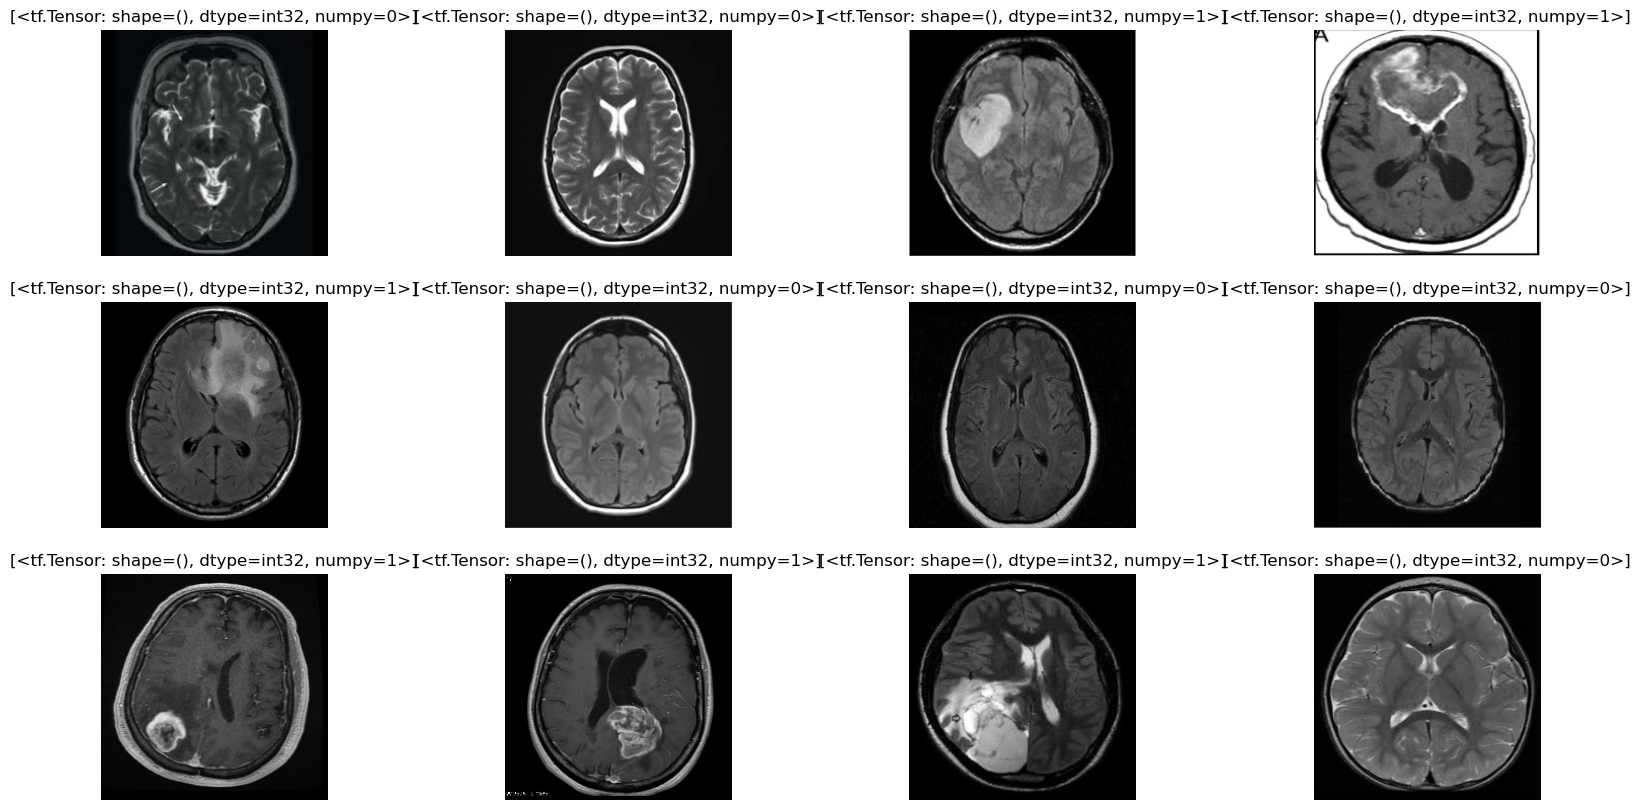

In [10]:
plt.figure(figsize=(20,10))
# for image_batch,label_batch in train_dataset.take(1):
image_batch,label_batch = next(iter(train_dataset)) 
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(image_batch[i])
    plt.title([label_batch[i]])
    plt.axis('off')
plt.show()